<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC DATA ANALYSIS - LOGISTIC REGRESSION**

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [103]:
titanic = pd.read_csv("train.csv")

In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
#Let's see how many people are there in the ship

print("No. of passengers : ",len(titanic.index))

No. of passengers :  891


***ANALYZING THE DATA***



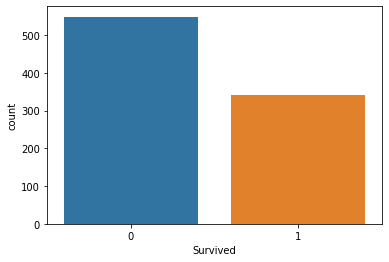

In [106]:
# To know how many passengers survived and how many did not survive

sns.countplot(x = 'Survived', data = titanic)

**OBSERVATION**

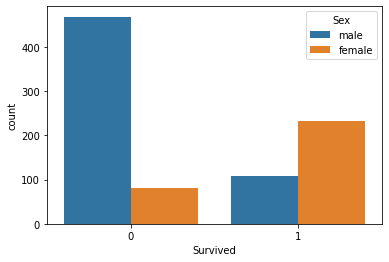

In [107]:
#How many male and female survived and how many of them died?

sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

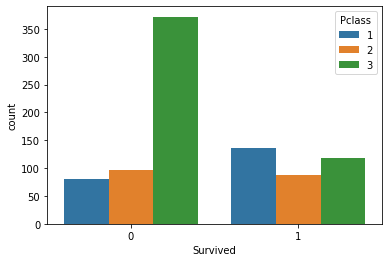

In [108]:
# To visualize the passenger class

sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

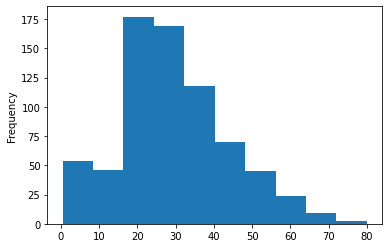

In [109]:
titanic["Age"].plot.hist()

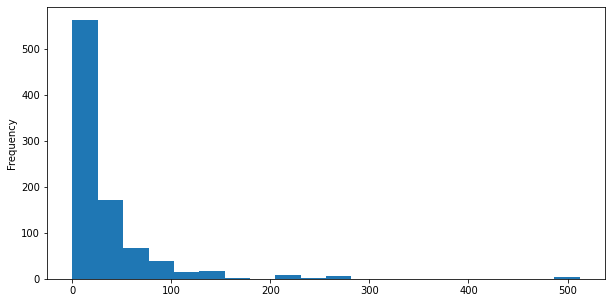

In [110]:
titanic["Fare"].plot.hist(bins = 20, figsize = (10,5))

In [111]:
# The ticket fare mostly purchased is from 1 to 500

In [112]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


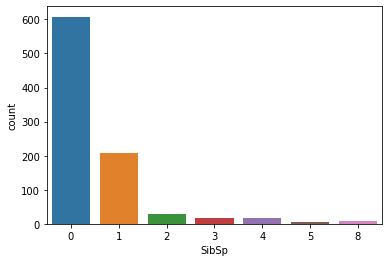

In [113]:
sns.countplot(x = "SibSp", data = titanic)

In [114]:
# Most of the value is on zero that is neither spouse nor children were on board the titanic.

***DATA WRANGLING***

In [115]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

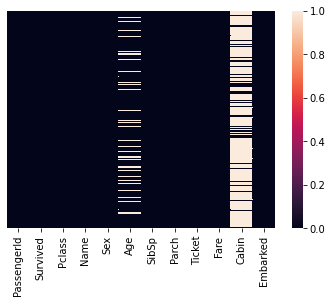

In [116]:
sns.heatmap(titanic.isnull(), yticklabels = False)

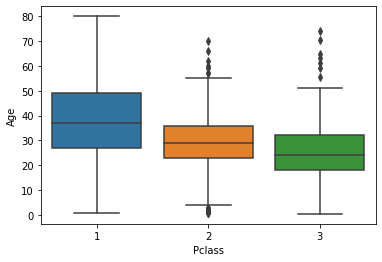

In [117]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic)

# Here we conclude that passenger travelling in Class 1 and Class 2 are older than Class 3

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# We have lots of null values for Cabin column, so we will just remove it

In [120]:
titanic.drop("Cabin", inplace = True, axis = 1)

In [121]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [122]:
titanic.dropna(inplace = True)

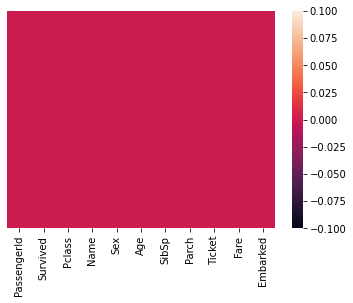

In [123]:
sns.heatmap(titanic.isnull(),yticklabels = False)

In [124]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [125]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


***ENCODING***

In [126]:
sex = pd.get_dummies(titanic["Sex"], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [127]:
embark = pd.get_dummies(titanic["Embarked"], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [128]:
pclass = pd.get_dummies(titanic["Pclass"], drop_first = True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [129]:
titanic = pd.concat([titanic, sex, embark, pclass], axis = 1)

In [130]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [131]:
titanic.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass"], axis = 1, inplace = True)

In [132]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


***TRAIN AND TEST SET***

In [133]:
x = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [136]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.75      0.67      0.71        89

    accuracy                           0.77       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[105,  20],
       [ 29,  60]])

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_test, predictions)

0.7710280373831776

In [141]:
probs = logmodel.predict_proba(X_test)
probs

array([[0.50609954, 0.49390046],
       [0.73384095, 0.26615905],
       [0.21725896, 0.78274104],
       [0.71225813, 0.28774187],
       [0.94669959, 0.05330041],
       [0.94482938, 0.05517062],
       [0.28738213, 0.71261787],
       [0.74006197, 0.25993803],
       [0.82831   , 0.17169   ],
       [0.27982232, 0.72017768],
       [0.04841462, 0.95158538],
       [0.36527196, 0.63472804],
       [0.03340484, 0.96659516],
       [0.84100399, 0.15899601],
       [0.7572562 , 0.2427438 ],
       [0.39104825, 0.60895175],
       [0.72784961, 0.27215039],
       [0.26132835, 0.73867165],
       [0.72963588, 0.27036412],
       [0.80257998, 0.19742002],
       [0.69507213, 0.30492787],
       [0.25448159, 0.74551841],
       [0.10467127, 0.89532873],
       [0.61500177, 0.38499823],
       [0.63263113, 0.36736887],
       [0.75439827, 0.24560173],
       [0.76616394, 0.23383606],
       [0.88808337, 0.11191663],
       [0.57533965, 0.42466035],
       [0.63353865, 0.36646135],
       [0.

In [142]:
from sklearn import metrics

prob_positive  = probs[:,1]         #class1
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve:", roc_auc)

Area under the curve: 0.8285393258426967


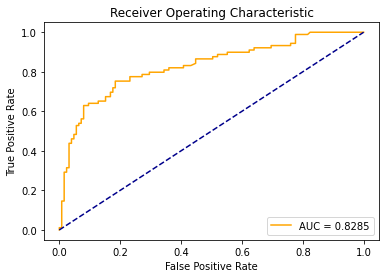

In [143]:
# Plot ROC curve

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()